In [ ]:
pip install torch matplotlib pandas transformers sacrebleu bert-score evaluate

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoModelForSeq2SeqLM,  Seq2SeqTrainingArguments,  Seq2SeqTrainer
import sacrebleu
from bert_score import score
import PerspectiveDataset as prep  # Your preprocessing module
from evaluate import load

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}


Original dataset size: 2236
Expanded dataset size (with all perspectives): 4368

Sample 1:
Input: Summarize the following content according to Perspective: INFORMATION_SUMMARY; INFORMATION_SUMMARY Definition: Defined as knowledge about diseases, disorders, and health-related facts, providing insights into symptoms and diagnosis.; Begin Summary with: For information purposes...; Tone of summary: Informative, Educational.; Content to summarize: u spelt it wrong !! Parkinson's disease is one of the most common neurologic disorders of the elderly. The term "parkinsonism" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson's disease by damaging or destroying dopamine neurons in a certain area of the brain. Parkinsonism describes the common symptoms of Parkinson's disease - tremor, rigidity, akinesia or bradykinesia and postural instability. Those patients who respond to drug treatment for Parkinson's disease are diagnosed with it, and

/raid/home/ganeshb/.venv/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_4146227/402512271.py:75: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer =  Seq2SeqTrainer(
/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}
/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than t

Step,Training Loss,Validation Loss,Bleu,Bertscore F1,Bertscore Recall,Bertscore Precision
500,1.077000,0.662701,0.735855,0.864562,0.847781,0.882693
1000,0.636900,0.652395,0.964455,0.873965,0.856285,0.893122
1500,0.562500,0.655515,1.045149,0.875681,0.858884,0.893901
2000,0.506900,0.664006,1.027629,0.877757,0.859527,0.897505
2500,0.455300,0.673268,1.082357,0.876967,0.859359,0.896038
3000,0.439500,0.683734,1.098806,0.876726,0.859384,0.895531


/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}
/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/raid/home/ganeshb/private/PerspectiveDataset.py:116: Us

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test set evaluation:
eval_loss: 0.6794
eval_bleu: 1.0743
eval_bertscore_f1: 0.8776
eval_bertscore_Recall: 0.8593
eval_bertscore_precision: 0.8974
eval_runtime: 153.2733
eval_samples_per_second: 8.1680
eval_steps_per_second: 2.0420
epoch: 6.0000


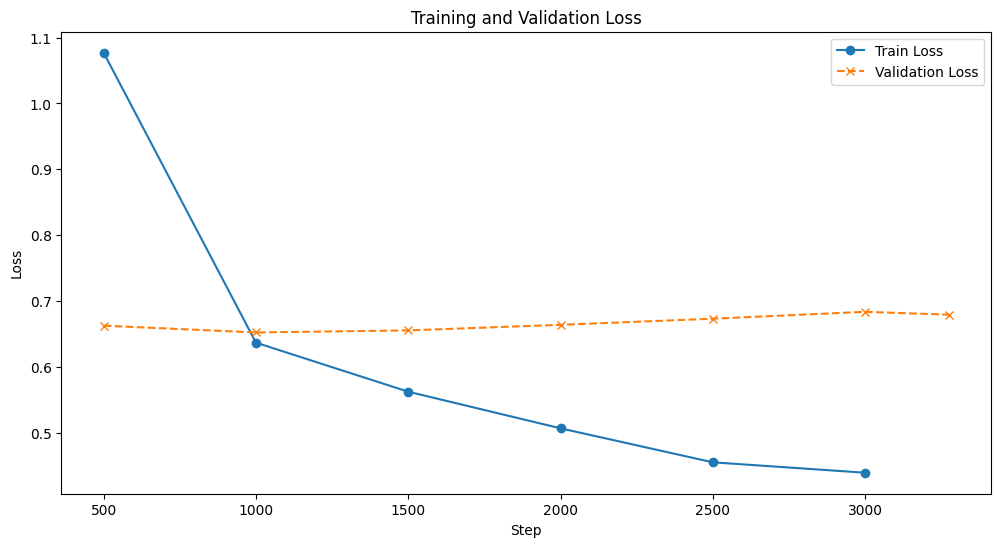

/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}
/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Metrics on the whole test dataset:
test_loss: 0.6794
test_bleu: 1.0743
test_bertscore_f1: 0.8776
test_bertscore_Recall: 0.8593
test_bertscore_precision: 0.8974
test_runtime: 153.7434
test_samples_per_second: 8.1430
test_steps_per_second: 2.0360


In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
import sacrebleu
from bert_score import score
import PerspectiveDataset as prep
from evaluate import load

os.environ["CUDA_VISIBLE_DEVICES"] = "5"

###################### Helper Functions ###########################
def filter_invalid_tokens(seq):
    """Remove tokens with value -100."""
    return [token for token in seq if token != -100]


def remove_empty_predictions(predictions, references):
    """Remove any empty predictions or labels to avoid warnings with BERTScore."""
    filtered_data = [(p, r) for p, r in zip(predictions, references) if p and r]
    if not filtered_data:
        return []
    return filtered_data


def compute_bleu_score(predictions, references):
    """Compute the SacreBLEU score."""
    bleu_metric = load("sacrebleu")
    return bleu_metric.compute(predictions=predictions, references=references)["score"]


def compute_bertscore_f1(predictions, references):
    """Compute the BERTScore F1."""
    P, R, f1_scores = score(predictions, references, lang="en", verbose=False)
    return P.mean().item(), R.mean().item(), f1_scores.mean().item()

def plot(trainer):
    logs_df = pd.DataFrame(trainer.state.log_history)

    train_logs = logs_df[logs_df['loss'].notnull()]
    plt.plot(train_logs['step'], train_logs['loss'], label="Train Loss", marker='o', linestyle='-')

    eval_logs = logs_df[logs_df['eval_loss'].notnull()]
    plt.plot(eval_logs['step'], eval_logs['eval_loss'], label="Validation Loss", marker='x', linestyle='--')

    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.savefig("training_validation_loss.png")
    plt.show()

##################### MAin Model #################
class Model:
    def __init__(self, model_name):
        self.trainer = None
        self.train_ds = None
        self.valid_ds = None
        self.test_ds = None
        self.model_name = model_name
        self.seq2seq_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, ignore_mismatched_sizes=True)
        self.seq2seq_tokenizer = prep.tokenizer
    def initialize_model_dataset(self):

        self.train_ds = prep.PerspectiveDataset(prep.train_data, self.seq2seq_tokenizer)
        self.valid_ds = prep.PerspectiveDataset(prep.val_data, self.seq2seq_tokenizer)
        self.test_ds = prep.PerspectiveDataset(prep.test_data,self.seq2seq_tokenizer)


    def compute_metrics(self, eval_pred):
        preds, targets = eval_pred

        # Filter out invalid tokens
        preds = [filter_invalid_tokens(seq) for seq in preds]
        targets = [filter_invalid_tokens(seq) for seq in targets]

        decoded_preds = [self.seq2seq_tokenizer.decode(seq, skip_special_tokens=True).strip().lower() for seq in preds]
        decoded_targets = [self.seq2seq_tokenizer.decode(seq, skip_special_tokens=True).strip().lower() for seq in targets]

        # print("Decoded Predictions:", decoded_preds)
        # print("Decoded Targets:", decoded_targets)
        
        is_empty = remove_empty_predictions(decoded_preds, decoded_targets)
        if not is_empty:
            return {"bleu": 0.0, "bertscore_f1": 0.0,
            "bertscore_Recall" : 0.0,
            "bertscore_precision" : 0.0}
        decoded_preds, decoded_targets = zip(*is_empty)

        bleu_result = compute_bleu_score(decoded_preds, decoded_targets)
        bert_P, bert_R,  bert_f1 = compute_bertscore_f1(decoded_preds, decoded_targets)
        return {
            "bleu": bleu_result,
            "bertscore_f1": bert_f1,
            "bertscore_Recall" : bert_R,
            "bertscore_precision" : bert_P
        }

    def evaluate_on_test(self ):
        test_results = self.trainer.evaluate(self.test_ds)
        print("Test set evaluation:")
        for metric, value in test_results.items():
            print(f"{metric}: {value:.4f}")

    def fit(self):
        training_args = Seq2SeqTrainingArguments(
            output_dir="./flan-t5-healthcare-summaries_final",
            evaluation_strategy="steps",
            save_strategy="epoch",
            learning_rate=2e-4,
            logging_steps=500,
            per_device_train_batch_size=8,
            per_device_eval_batch_size=8,
            weight_decay=0.01,
            save_total_limit=2,
            num_train_epochs=6,
            gradient_accumulation_steps=2,
            predict_with_generate=True,
            fp16=False,
            logging_dir="./logs",
            report_to="none",
        )

        self.trainer = Seq2SeqTrainer(
            model=self.seq2seq_model,
            args=training_args,
            train_dataset=self.train_ds,
            eval_dataset=self.valid_ds,
            tokenizer=self.seq2seq_tokenizer,
            compute_metrics=self.compute_metrics
        )

        self.trainer.train()
        self.trainer.evaluate(self.test_ds)
        plot(self.trainer)
        save_directory = "../flan-t5-model_checkpoint"
        self.seq2seq_model.save_pretrained(save_directory)
        self.seq2seq_tokenizer.save_pretrained(save_directory)

        predictions_output = self.trainer.predict(self.test_ds)
        metrics = predictions_output.metrics

        print("Metrics on the whole test dataset:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")


model_name = "google/flan-t5-base"
model = Model(model_name)
model.initialize_model_dataset()
model.fit()

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM
import PerspectiveDataset as prep  # Your preprocessing module

# Specify the checkpoint directory (same as output_dir used during training)
checkpoint_path = "../flan-t5-model_checkpoint"

# Load the saved model checkpoint
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)
tokenizer = prep.tokenizer

# Creating the test dataset instance
test_dataset = prep.PerspectiveDataset(prep.test_data[:100], tokenizer)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode

# Generating predictions for the first 20 test entries and save them to a file
output_filename = "test_predictions_from_checkpoint.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    for i in range(20):
        # Geting the i-th sample from the test dataset
        sample = test_dataset[i]
        # Ensuring input is on the proper device and add batch dimension
        input_ids = sample["input_ids"].unsqueeze(0).to(device)
        # Generating prediction (adjust max_length if needed)
        generated_ids = model.generate(input_ids, max_length=512)
        pred_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        
        f.write(f"Entry {i+1}:\n")
        f.write(f"Prediction: {pred_text}\n\n")

print(f"Predictions for first 20 test entries have been saved to '{output_filename}'.")


/raid/home/ganeshb/private/PerspectiveDataset.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = {key: torch.tensor(val).squeeze(0) for key, val in input.items()}


Predictions for first 20 test entries have been saved to 'test_predictions_from_checkpoint.txt'.
